<a href="https://colab.research.google.com/github/sifayathf/streamlit-example/blob/master/Langgraphworkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
url = "https://api.groq.com/openai/v1/chat/completions"

# Your API Key
api_key = "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"  # Replace with your actual API key

# Define the headers
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json",
}

# Define the payload
payload = {
    "model": "llama-3.3-70b-versatile",  # Replace with the model you intend to use
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the weather today?"},
    ],
    "temperature": 0.7,
}

# Make the POST request
response = requests.post(url, headers=headers, json=payload)

# Check the response
if response.status_code == 200:
    print("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)

Response: {'id': 'chatcmpl-2d0110f0-3449-4f44-8482-206abe2f6cdb', 'object': 'chat.completion', 'created': 1743544918, 'model': 'llama-3.3-70b-versatile', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "I'm not currently able to access real-time information or your location. However, I can suggest some ways for you to find out the weather today:\n\n1. Check online weather websites: You can visit websites like AccuWeather, Weather.com, or the National Weather Service (NWS) to get the current weather conditions and forecast for your area.\n2. Use a mobile app: Download a weather app on your smartphone, such as Dark Sky or Weather Underground, to get real-time weather updates and forecasts.\n3. Check local news: Watch local news or check the website of your local news station to get the current weather conditions and forecast.\n4. Look out the window: If you're at home or in a location with a window, you can simply look outside to get an idea of the current weather co

In [ ]:
# prompt: Llm initialize langchain chat groq

from langchain.schema import HumanMessage, SystemMessage
from langchain_groq import ChatGroq


# Your API Key
api_key = "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"  # Replace with your actual API key

# Initialize the ChatGroq model
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

# Create messages
messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="What is the weather today?"),
]

# Generate the response
response = llm(messages)

# Print the response
response.content

<ipython-input-3-df6ae0748a5f>:20: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(messages)


"I'm a large language model, I don't have have access to real-time information or specific location data. I can suggest some ways for you to find out the current weather:\n\n1. Check online weather websites: You can visit websites like AccuWeather, Weather.com, or the National Weather Service (NWS) to get the current weather conditions and forecast for your location.\n2. Use a mobile app: You can download mobile apps like Dark Sky, Weather Underground, or The Weather Channel to get the current weather conditions and forecast on your smartphone.\n3. Check local news: You can watch local news or check the website of your local news station to get the current weather conditions and forecast.\n4. Look out the window: If you're at home or in a location with a window, you can simply look outside to get an idea of the current weather conditions.\n\nPlease let me know if you need any further assistance!"

In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 17.7 MB/s eta 0:00:00


In [ ]:
! pip install langchain_community langchain langchain_groq> /dev/null

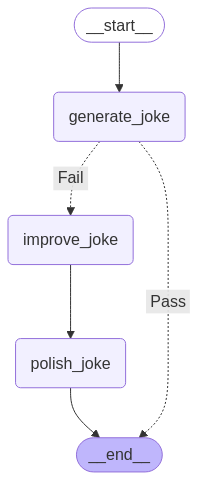

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [ ]:

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")

In [ ]:
# prompt: For the above code I want you to design a json and the nodes and edges should be created from json instead of hard coding

import json
import requests
from langchain.schema import HumanMessage, SystemMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Load JSON workflow definition
try:
    with open("workflow.json", "r") as f:
        workflow_data = json.load(f)
except FileNotFoundError:
    print("Error: workflow.json not found. Please provide a valid JSON file.")
    exit()

# Your API Key (replace with your actual API key)
api_key = "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"

# Initialize the ChatGroq model
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

# Graph state (from JSON)
class State(TypedDict):
    pass  # State definition will be populated from the JSON

# Function to dynamically create node functions from JSON
def create_node_function(node_data):
    def node_function(state: State):
        prompt = node_data["prompt"]
        for key, value in state.items():
            prompt = prompt.replace(f"{{{key}}}", value)
        msg = llm.invoke(prompt)
        return {node_data["output_key"]: msg.content}
    return node_function


# Build workflow from JSON
workflow = StateGraph(State)
for node_key, node_data in workflow_data["nodes"].items():
  workflow.add_node(node_key, create_node_function(node_data))

for edge in workflow_data["edges"]:
    if "condition" in edge:
        workflow.add_conditional_edges(edge["source"], edge["condition"], edge["targets"])
    else:
        workflow.add_edge(edge["source"], edge["target"])

# Add default start and end edges if not specified in JSON
if START not in [edge["source"] for edge in workflow_data["edges"]]:
    workflow.add_edge(START, workflow_data["nodes"][list(workflow_data["nodes"])[0]]["name"])
if END not in [edge["target"] for edge in workflow_data["edges"]]:
    workflow.add_edge(list(workflow_data["nodes"])[-1]["name"], END)


# Compile and display the graph
chain = workflow.compile()
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke the workflow
state = chain.invoke(workflow_data["input"])  # Pass input from JSON

# Print output (adapt to your JSON output structure)
for key, value in state.items():
    print(f"{key}: {value}")

Error: workflow.json not found. Please provide a valid JSON file.


AttributeError: 'list' object has no attribute 'items'

In [ ]:
# prompt: For the above code I want you to design a json and the nodes and edges should be created from json instead of hard coding. hardcode the json in a variable

import requests
from langchain.schema import HumanMessage, SystemMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import json

url = "https://api.groq.com/openai/v1/chat/completions"

# Your API Key
api_key = "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"  # Replace with your actual API key

# ... (rest of your existing code)

# Initialize the ChatGroq model
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str

#def generate_joke(state: State):    """First LLM call to generate initial joke"""

#    msg = llm.invoke(f"Write a short joke about {state['topic']}")
#    return {"joke": msg.content}

def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow

# Define the JSON workflow
workflow_json = """
{
  "nodes": [
    {"name": "generate_joke", "function": "generate_joke"},
    {"name": "check_punchline", "function": "check_punchline"},
    {"name": "improve_joke", "function": "improve_joke"},
    {"name": "polish_joke", "function": "polish_joke"}
  ],
  "edges": [
    {"source": "START", "target": "generate_joke"},
    {"source": "generate_joke", "target": "check_punchline", "conditional": true},
    {"source": "check_punchline", "target": "improve_joke", "condition": "Fail"},
    {"source": "check_punchline", "target": "END", "condition": "Pass"},
    {"source": "improve_joke", "target": "polish_joke"},
    {"source": "polish_joke", "target": "END"}
  ]
}
"""

# Load the workflow from JSON
workflow_data = json.loads(workflow_json)

# ... (Your existing functions: generate_joke, check_punchline, improve_joke, polish_joke)

# Build workflow from JSON
workflow = StateGraph(State)

# Add nodes from JSON
for node_data in workflow_data["nodes"]:
  node_name = node_data["name"]
  node_function = globals()[node_data["function"]] # Get the function by name
  workflow.add_node(node_name, node_function)


# Add edges from JSON
for edge_data in workflow_data["edges"]:
    print( edge_data)
    source = edge_data["source"]
    target = edge_data["target"]
    if "conditional" in edge_data and edge_data["conditional"]:
        workflow.add_conditional_edges(
            source, check_punchline, {edge_data["conditional"]: target}
        )

    else:
        workflow.add_edge(source, target)

# ... (Rest of your code: Compile, show workflow, invoke)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")

{'source': 'START', 'target': 'generate_joke'}
{'source': 'generate_joke', 'target': 'check_punchline', 'conditional': True}
{'source': 'check_punchline', 'target': 'improve_joke', 'condition': 'Fail'}
{'source': 'check_punchline', 'target': 'END', 'condition': 'Pass'}
{'source': 'improve_joke', 'target': 'polish_joke'}
{'source': 'polish_joke', 'target': 'END'}


ValueError: Found edge starting at unknown node 'START'

In [ ]:
import requests
from langchain.schema import HumanMessage, SystemMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import json

# Your you set it from a secure environment)
api_key = "your_api_key_here"  # Replace with your actual API key

# Initialize the ChatGroq model
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str

def generate_joke(state: State):
    """First LLM call to generate initial joke"""
    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""
    return "Fail" if "?" in state["joke"] or "!" in state["joke"] else "Pass"

def improve_joke(state: State):
    """Second LLM call to improve the joke"""
    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}

def polish_joke(state: State):
    """Third LLM call for final polish"""
    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}

# Define the JSON workflow
workflow_json = """
{
  "nodes": [
    {"name": "generate_joke", "function": "generate_joke"},
    {"name": "check_punchline", "function": "check_punchline"},
    {"name": "improve_joke", "function": "improve_joke"},
    {"name": "polish_joke", "function": "polish_joke"}
  ],
  "edges": [
    {"source": "START", "target": "generate_joke"},
    {"source": "generate_joke", "target": "check_punchline"},
    {"source": "check_punchline", "target": "improve_joke", "condition": "Fail"},
    {"source": "check_punchline", "target": "END", "condition": "Pass"},
    {"source": "improve_joke", "target": "polish_joke"},
    {"source": "polish_joke", "target": "END"}
  ]
}
"""

# Load workflow from JSON
workflow_data = json.loads(workflow_json)

# Build workflow from JSON
workflow = StateGraph(State)

# Add nodes dynamically
for node_data in workflow_data["nodes"]:
    node_name = node_data["name"]
    node_function = globals()[node_data["function"]]
    workflow.add_node(node_name, node_function)

# Add edges dynamically
for edge_data in workflow_data["edges"]:
    source = edge_data["source"]
    target = edge_data["target"]

    if "condition" in edge_data:
        workflow.add_conditional_edges(source, check_punchline, {edge_data["condition"]: target})
    else:
        workflow.add_edge(source, target)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke with sample input
state = chain.invoke({"topic": "cats"})

print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")

if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")
    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")

ValueError: Branch with name `check_punchline` already exists for node `check_punchline`

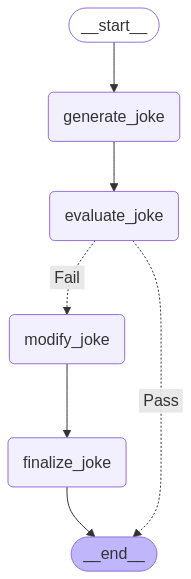

InvalidUpdateError: Expected dict, got Pass
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
import json
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from IPython.display import Image, display

# API Key (Replace with actual API key)
api_key = "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"

# Initialize the ChatGroq model
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

# Define state structure
class State(TypedDict):
    topic: str
    joke: str
    modified_joke: str
    final_joke: str

# Function Definitions
def generate_joke(state: State):
    """Generate an initial joke."""
    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

def evaluate_joke(state: State):
    """Evaluate if the joke has a punchline dynamically."""
    return "Fail" if "?" not in state["joke"] and "!" not in state["joke"] else "Pass"

def modify_joke(state: State):
    """Enhance the joke by improving wordplay."""
    msg = llm.invoke(f"Modify this joke to be funnier: {state['joke']}")
    return {"modified_joke": msg.content}

def finalize_joke(state: State):
    """Finalize joke with a surprise twist."""
    msg = llm.invoke(f"Add an unexpected twist to this joke: {state['modified_joke']}")
    return {"final_joke": msg.content}

# Load JSON Workflow
workflow_json = '''{
  "nodes": [
    {"name": "generate_joke", "function": "generate_joke"},
    {"name": "evaluate_joke", "function": "evaluate_joke"},
    {"name": "modify_joke", "function": "modify_joke"},
    {"name": "finalize_joke", "function": "finalize_joke"}
  ],
  "conditions": [
    {
      "node": "evaluate_joke",
      "function": "evaluate_joke",
      "outcomes": {
        "Fail": "modify_joke",
        "Pass": "__end__"
      }
    }
  ],
  "edges": [
    {"source": "__start__", "target": "generate_joke"},
    {"source": "generate_joke", "target": "evaluate_joke"},
    {"source": "modify_joke", "target": "finalize_joke"},
    {"source": "finalize_joke", "target": "__end__"}
  ]
}'''

workflow_data = json.loads(workflow_json)

# Initialize workflow
workflow = StateGraph(State)

# Add nodes dynamically
for node_data in workflow_data["nodes"]:
    node_name = node_data["name"]
    node_function = globals()[node_data["function"]]
    workflow.add_node(node_name, node_function)

# Add edges dynamically
for edge_data in workflow_data["edges"]:
    source = edge_data["source"]
    target = edge_data["target"]
    workflow.add_edge(source, target)

# Add conditional edges dynamically
for condition_data in workflow_data["conditions"]:
    node_name = condition_data["node"]
    check_function = globals()[condition_data["function"]]
    workflow.add_conditional_edges(node_name, check_function, condition_data["outcomes"])

# Compile workflow
chain = workflow.compile()

# Show workflow graph
display(Image(chain.get_graph().draw_mermaid_png()))

# Execute workflow with sample input
state = chain.invoke({"topic": "cats"})

print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")

if "modified_joke" in state:
    print("Modified joke:")
    print(state["modified_joke"])
    print("\n--- --- ---\n")
    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")